# Lab 5 : Unsupervised Learning - Searching for a new galaxy


The goal of this lab is to:

* Work on several examples of unsupervised learning.
* Use K-means clustering to perform classification. 
* Use Gaussian mixture modeling to for classification and density estimation. 
* Determine the optimal number of clusters to use for a problem. 
* Identify the remants of a dwarf galaxy that merged with the Milky Way using velocity and metal abundance measurements of stars from the Gaia survey. 

Created by: Tuan Do & Bernie Boscoe
Last update: Tuan Do

In [1]:
# put your imports here
import numpy as np
import pylab as plt
import pandas as pd

# Part 1 - K-Means Clustering

K-means clustering is a simple clustering algorithm, which contains just a few steps:

1. Guess some cluster centers
2. Repeat the following until converged
    * Expectation step – assign points to the nearest cluster center
    * Maximization step – set the cluster centers to the mean. 

Convergence is defined as when the centroid of the cluster does not change after Step 2. 

In this part of the lab, you will generate random clusters and practice using K-means clustering to learn about the model and its performance. 

## Part 1.1 - Generating random clusters

We will generate first a random set of clusters with 2 features. 

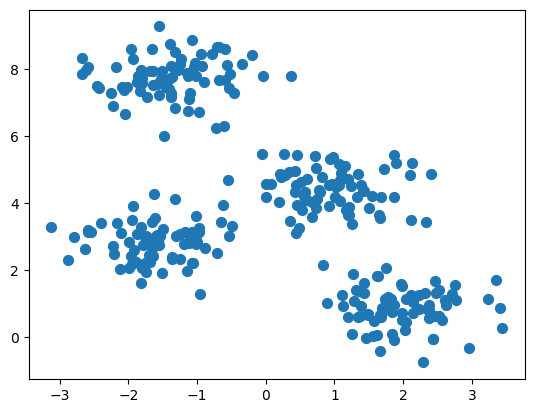

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

## Part 1.2 -  Building and training a K-means classifier 

## Question 1
(5 pts)

Now, read the K-means documentation in sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) and create a K-means classifier and train it. 

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(X)
y_pred = kmeans.predict(X)

**Visualize your fit** - plot the different detected clusters

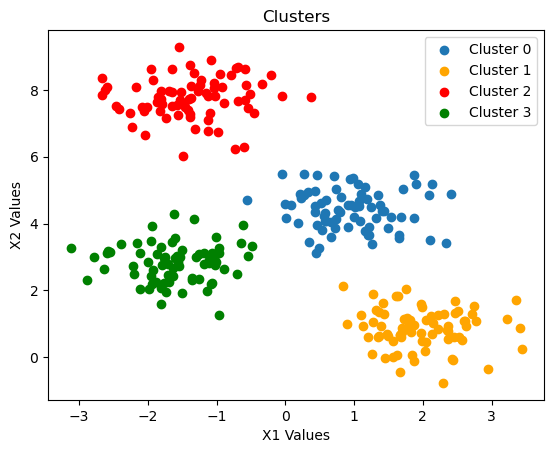

In [4]:
c0_y = X[:, 1][y_pred == 0]
c0_X = X[:, 0][y_pred == 0]

c1_y = X[:, 1][y_pred == 1]
c1_X = X[:, 0][y_pred == 1]

c2_y = X[:, 1][y_pred == 2]
c2_X = X[:, 0][y_pred == 2]

c3_y = X[:, 1][y_pred == 3]
c3_X = X[:, 0][y_pred == 3]

plt.scatter(c0_X, c0_y, label="Cluster 0")
plt.scatter(c1_X, c1_y, color="orange", label="Cluster 1")
plt.scatter(c2_X, c2_y, color="red", label="Cluster 2")
plt.scatter(c3_X, c3_y, color="green", label="Cluster 3")

plt.xlabel("X1 Values")
plt.ylabel("X2 Values")
plt.legend(loc="upper right")
plt.title("Clusters")
plt.show()

**Decision Boundaries** below is the code to help you visualize the decision boundaries of your model. Run it and make a plot for your clusters. 

In [5]:
#  Code to plot decision boundaries for K-means

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

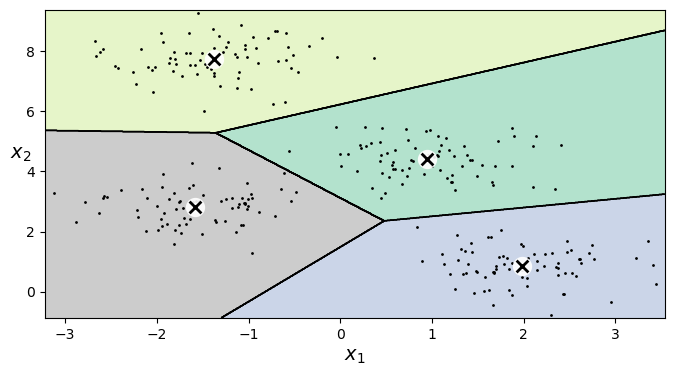

In [6]:
# visualize the decision boundaries
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

## Part 1.2 - fitting a different number of cluster

The number of clusters is a hyperparameter for the K-means clustering algorithm. 

What will happen if we fit 3 clusters instead of 4 clusters? 


## Question 2
(2 pts)

Before writing code, **predict where you think the centroid of the 3 clusters will be and discuss why.** A rough estimate of the centroid is fine. 


I believe since the top and bottom clusters are further away from the clusters in the middle layer, their centers would be slightly shifted towards the center but not by much. However, the 2 clusters in the middle layer will be grouped together with their new center being right in the middle thus leasing to 3 clusters in all. The new centers of the clusters will be at (-1, 7), (0, -1), (1, 2). Thus, the centroid of the 3 clusters will be (0, 2.67).

## Question 3
(5 pts)

**Below, write the code to fit for 3 clusters instead of 4 to the same dataset as above using the K-means algorithm.**


In [7]:
kmeans2 = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X)
y_pred2 = kmeans2.predict(X)

**Now, visualize the fit with only 3 clusters**

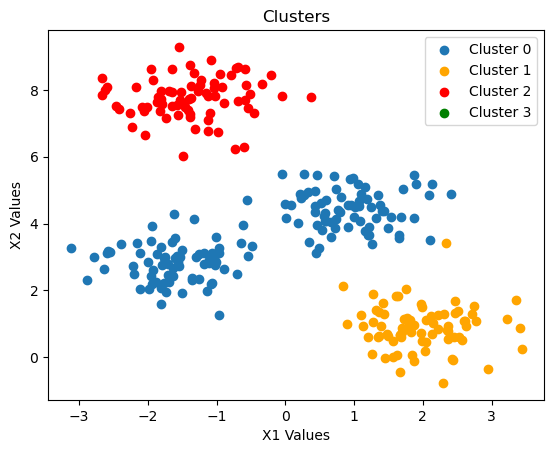

In [8]:
c0_y2 = X[:, 1][y_pred2 == 0]
c0_X2 = X[:, 0][y_pred2 == 0]

c1_y2 = X[:, 1][y_pred2 == 1]
c1_X2 = X[:, 0][y_pred2 == 1]

c2_y2 = X[:, 1][y_pred2 == 2]
c2_X2 = X[:, 0][y_pred2 == 2]

c3_y2 = X[:, 1][y_pred2 == 3]
c3_X2 = X[:, 0][y_pred2 == 3]

plt.scatter(c0_X2, c0_y2, label="Cluster 0")
plt.scatter(c1_X2, c1_y2, color="orange", label="Cluster 1")
plt.scatter(c2_X2, c2_y2, color="red", label="Cluster 2")
plt.scatter(c3_X2, c3_y2, color="green", label="Cluster 3")

plt.xlabel("X1 Values")
plt.ylabel("X2 Values")
plt.title("Clusters")
plt.legend(loc="upper right")
plt.show()

## Part 1.3 - Determining the Optimal Number of Clusters for K-Means


It can be difficult to determine the correct number of clusters because the definition of a cluster can be pretty vauge. There are a few guidelines we methods that we can use though to help us. We will follow the two methods used in Hands-On Machine Learning 2nd Edition:

1. Look for the 'elbow' in the plot of the number of clusters vs. interia. 
2. Look at the silhouette score as a function of the number of clusters. 



### Part 1.3a - Plot the intertia as a function of number of clusters

## Question 4
(2 pts)

Once the model is trained the kmeans object from sci-kit learn has an ``inertia_`` attribute that measures the inertia of the fit (see https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). 

**Make a plot of the interia as a function of number of clusters (from 1 to 8 clusters)**

Text(0.5, 1.0, 'Inertia as Function of Number of Clusters')

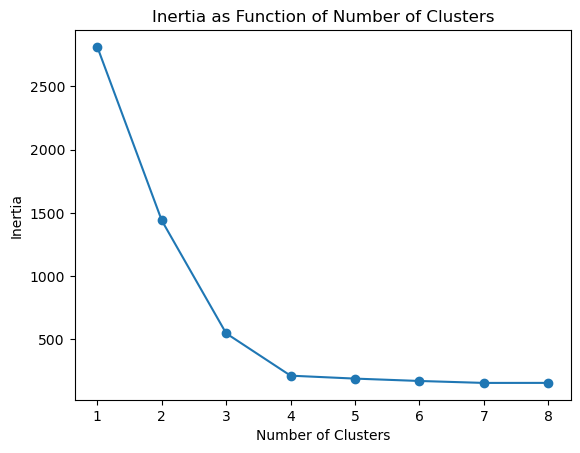

In [9]:
MAX_CLUSTERS = 8

num_clusters = np.arange(1, MAX_CLUSTERS+1)
inertias = []
for i in range(MAX_CLUSTERS):
    kmeans_i = KMeans(n_clusters=i+1, n_init='auto', random_state=42).fit(X)
    inertias.append(kmeans_i.inertia_)

plt.scatter(num_clusters, inertias)
plt.plot(num_clusters, inertias)

plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Inertia as Function of Number of Clusters")

In the plot above, there should be a point on the plot where it becomes flat. This point is called the elbow and is a good candidate for the optimal number of clusters in your model. 

## Question 5
(2 pts)

**Where is the elbow for your dataset? Explain qualitatively why the curve flatens out (remember the definition of inertia).**

The elbow of the dataset occurs at n = 4 clusters. The inertia is the sum of squared distances of samples to their closes cluster center. As the number of clusters increases, the inertia goes down since more centers are present which the sample can be closer to. Once the appropriate number of clusters is reached, the inertia score drastically decreases and proceeds to flatten as show in the plot above. The curve flattens out since increase in the number of clusters produces a mariginal or negligible decrease in value of inertia signifying we have reached the optimal number of clusters.

### Part 1.3b - Using the silhouette coefficient

Another method to find the optimal number of clusters is to use the silhoueet coefficient. 

See the documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

## Question 6
(2 pts)

**Plot below the silhouette coefficient for the your dataset as a function of the number of clusters (from 1 to 8)**

Text(0.5, 1.0, 'Silhouette Score as Function of Number of Clusters')

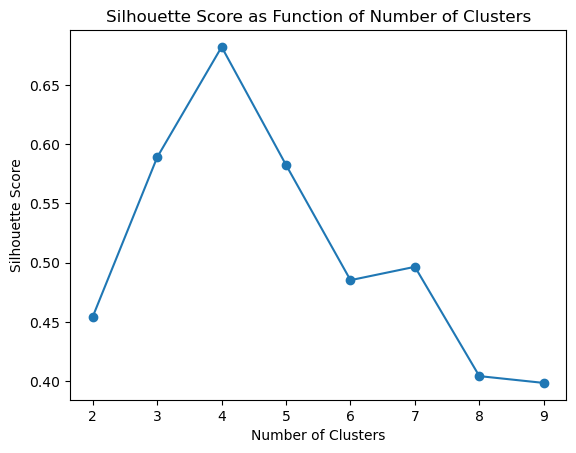

In [10]:
from sklearn.metrics import silhouette_score

sil_scores = []
num_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
iter = np.arange(1, MAX_CLUSTERS+1)
for i in iter:
    kmeans_i = KMeans(n_clusters=i+1, n_init="auto", random_state=0).fit(X)
    sil_score = silhouette_score(X, kmeans_i.labels_, metric="euclidean")
    sil_scores.append(sil_score)

plt.scatter(num_clusters, sil_scores)
plt.plot(num_clusters, sil_scores)

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score as Function of Number of Clusters")

**In the plot above, what is the best sihouette score? Explain qualitatively why the sihouette score peaks where it does.**

In [11]:
print("The best silhouette score is:", np.max(sil_scores))

The best silhouette score is: 0.6819938690643478


The best silhouette score occurs at 4 clusters and is printed above. The silhouette score peaks here since we have maximized the separation between clusters and ensured that there are less points on the boundaries of the regions occupied by neighboring clusters, thus ensuring greater confidence in classification of samples.

# Part 2 - Gaussian Mixture Modeling

Gaussian Mixture Modeling is a lot more flexible than K-means. It can be used for cluster, but also for modeling the probability distribution of the data points. Gaussian mixture modeling can be thought of as fitting N multi-densional Gaussian with M dimensions where M is the nubmer of features in the data. 

For this part of the lab, we will explore how to use sci-kit learn's Gaussian model, how to visualize the fitted model, make predictions from the model, and determine the optimial number of clusters. 

## Part 2.1 - Generating data

**Create the dataset by running the code below.**

In [12]:
# create the dataset
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

## Question 7 
(2 pts)

**Visualize the dataset** - plot the ``X`` arrays of features. Describe where you would place the cluster center by eye.

Text(0.5, 1.0, 'X Arrays of Features')

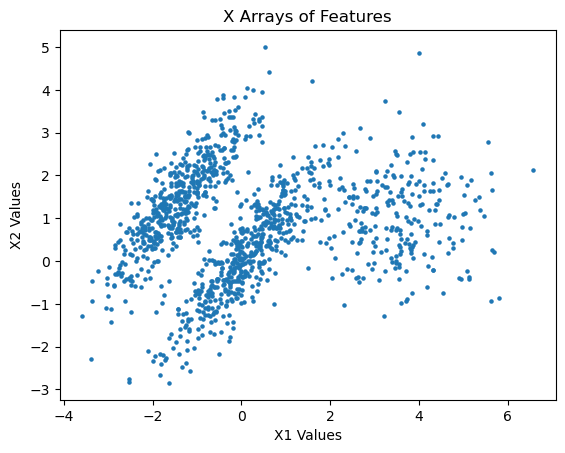

In [13]:
plt.scatter(X[:,0], X[:,1], s=5)
plt.xlabel("X1 Values")
plt.ylabel("X2 Values")
plt.title("X Arrays of Features")

From the data, it seems that there are 3 clusters. For the cluster on the left, I would place the cluster center at around (-1, 2). For the cluster in the middle, I would place the cluster center at around (0, 0). For the cluster on the right, I would place the cluster center at around (4, 1).

## Part 2.2 - Fitting a Gaussian Mixture model

**Read** the documentation for sci-kit learn's implementation of the Gaussian mixture model:

https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html


## Question 8
(3 pts)

**Use the sci-kit learn Gaussian mixture model to fit the data above.**

In [14]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=42).fit(X)

## Question 9
(2 pts)

**Examine the following attributes of your model and explain what they mean**

- ``.weights_``
- ``.means_``
- ``.covariances_``
- ``.converged_``
- ``.n_iter_``


In [15]:
print("GMM Weights:", gm.weights_) # Gives the fraction of data in each cluster
print("GMM Means:", gm.means_) # Gives the mean of each mixture component
print("GMM Covariances:\n", gm.covariances_) # Gives the covariance of each mixture component
print("GMM Converged:\n", gm.converged_) # Tells us if the model has converged
print("GMM Number of Iterations:", gm.n_iter_) # Tells us number of steps until convergence is attained

GMM Weights: [0.39019634 0.2097235  0.40008016]
GMM Means: [[ 0.05116693  0.07505701]
 [ 3.39839223  1.05935389]
 [-1.40763382  1.42705028]]
GMM Covariances:
 [[[ 0.68778225  0.79591107]
  [ 0.79591107  1.2122181 ]]

 [[ 1.14929846 -0.03260641]
  [-0.03260641  0.95490238]]

 [[ 0.63478593  0.7296996 ]
  [ 0.7296996   1.1610729 ]]]
GMM Converged:
 True
GMM Number of Iterations: 4


**Visualize the model** - run the following cells to visualize the predictions from the Gaussian mixture model

In [16]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

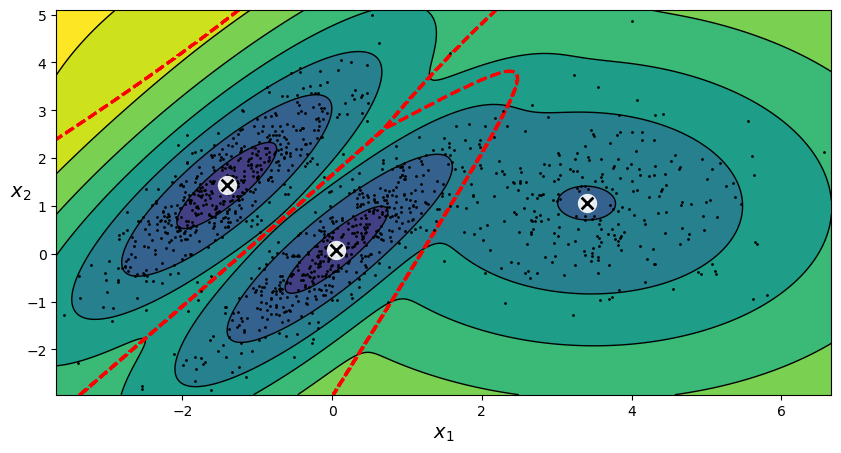

In [17]:
plt.figure(figsize=(10, 5))
plot_gaussian_mixture(gm, X)

## Part 2.3 - Prediction and Generating new instances using the model

Since Gaussian mixture models are probabilistic, we can use it to determine the probability of belonging to a given cluster for any instance of the dataset. We can also generate new instances of data given a trained model. 



## Question 10
(4 pts)

**Predict the class and probability of each instance of the training data. Compare the predictions with the number of instances you expected to be in each cluster**

Hint: use the ``.predict()`` and ``.predict_proba()`` methods

In [18]:
print("Predicted class of each instance in training data is:", gm.predict(X))
print("Probability of each instance in training data is:\n", gm.predict_proba(X))

Predicted class of each instance in training data is: [0 0 2 ... 1 1 1]
Probability of each instance in training data is:
 [[9.76660045e-01 2.33392754e-02 6.79713861e-07]
 [9.82749546e-01 1.65734903e-02 6.76963988e-04]
 [7.42959049e-05 2.04887015e-06 9.99923655e-01]
 ...
 [4.22276096e-07 9.99999578e-01 2.16925932e-26]
 [4.94998469e-16 1.00000000e+00 1.49550511e-41]
 [2.20699734e-15 1.00000000e+00 8.20533650e-41]]


**Generate 2000 new samples of the dataset and plot them**

Hint: use the ``.sample`` method in the trained model to generate instances. 

Text(0.5, 1.0, 'New Instances of Training Data')

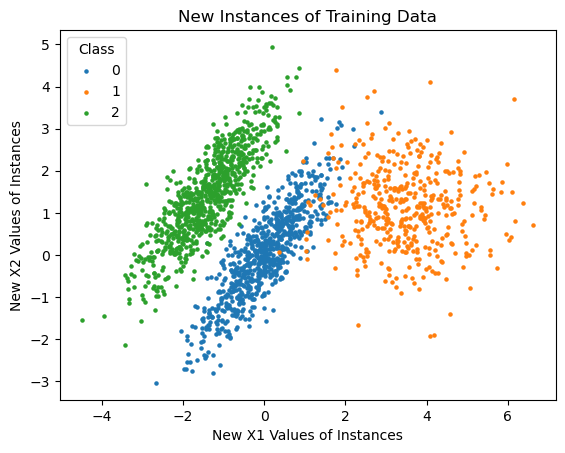

In [19]:
new_X, new_y = gm.sample(n_samples=2000)

for class_label in set(new_y): # Iterate through data for each class
    class_indices = new_y == class_label
    plt.scatter(new_X[class_indices, 0], new_X[class_indices, 1],
                s=5, label=f'{class_label}') # Create a legend (aka me)

plt.xlabel("New X1 Values of Instances")
plt.ylabel("New X2 Values of Instances")
plt.legend(loc="upper left", title="Class")
plt.title("New Instances of Training Data")

## Part 2.4 Determining the Optimal Number of Clusters

Gaussian mixtures are a probabilistic model, so we can use our Bayesian inference framework for things like model selection. In this case, we want to compare models with different number of clusters and select the one that best explain the data with the fewest parameters. 

There are two Bayesian model selection criteria that are built into sci-kit learn: 

* Bayesian Information Criterion
* Akaike Information Criterion 

Both of these criteria are described in Chapter 9 of Hands-On ML 2nd Edition. For both of these information criteria, you want the model that has the lowest value. 

NOTE: you can also use these criteria to select between different kinds of Gaussian models. For example, the sci-kit learn Gaussian mixture model has different choices for the type of covariance to fit using the ``covariance_type`` keyword. 



## Question 11
(4 pts)

**Compute the BIC and the AIC for a Gaussian mixture model with between 1 to 8 clusters. What is the optimal number of clusters?**

In [20]:
MAX_NUM_CLUSTERS = 8

bics = []
aics = []
for i in range(MAX_NUM_CLUSTERS):
    gm = GaussianMixture(n_components=i+1, random_state=42).fit(X)
    bics.append(gm.bic(X))
    aics.append(gm.aic(X))

# Optimal number of clusters corresponds to minimum BIC score, AIC score
opt_num_bic = np.argmin(bics)+1
min_bic = np.min(bics)

opt_num_aic = np.argmin(aics)+1
min_aic = np.min(aics)

print("According to BIC, the optimal number of clusters is:", opt_num_bic, "with the BIC score being:", min_bic)
print("According to AIC, the optimal number of clusters is:", opt_num_aic, "with the AIC score being:", min_aic)
print("Thus, both these criteria show us the optimal number of clusters is:", opt_num_bic)

According to BIC, the optimal number of clusters is: 3 with the BIC score being: 8189.761570083466
According to AIC, the optimal number of clusters is: 3 with the AIC score being: 8102.536289968428
Thus, both these criteria show us the optimal number of clusters is: 3


## Part 2.5 - Fitting for both the cluster parameters and the number of clusters at the same time

Since we are using a Bayesian framework, we can also fit for the number of clusters directly in our inference for the cluster parameters. In fact, this is generally how you would want to try in real-world data as it tends to be more robust to fit everything together. 

Luckily sci-kit learn has this capability for Gaussian mixture modeling through the ``BayesianGaussianMixture`` model. Read the documentation at: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.BayesianGaussianMixture.html



## Question 12
(4 pts)

**Fit the dataset above using the ``BayesianGaussianMixture`` model** 

Note that to use ``BayesianGaussianMixture``, you will need to give it an initial guess for the number of clusters. Make this initial guess large (like 10). 

In [21]:
from sklearn.mixture import BayesianGaussianMixture

# Initial guess for number of clusters is 10
bgm = BayesianGaussianMixture(n_components=10, random_state=42, n_init=5).fit(X)

**Examine the ``.weights_`` attribute after fitting. What does it mean?**

In [22]:
bgm.weights_

array([3.95127351e-01, 2.05029810e-01, 8.51923159e-04, 3.98832938e-01,
       1.44798853e-04, 1.19811223e-05, 1.08919211e-06, 9.90174642e-08,
       9.00158766e-09, 8.18326151e-10])

The weights attribute tells us the fraction of data in each cluster.

# Part 3 - Discovering a new dwarf galaxy embedded in the Milky Way

The Gaia spacecraft and the all sky survey that it is producing is changing many aspects of astronomy. The Gaia catalog now contains over 2 billion sources with position and velocity measurements. 

One of the big discoveries of Gaia is the detection of the remnant of a dwarf galaxy embedded in the Milky Way that was previously hidden from view because the stars are mixed with the Milky Way stars. This dwarf galaxy is called Gaia-Enceladus (also known as the Gaia Sausage). More details can be found in the discovery paper from Helmi et al. (2018): https://arxiv.org/abs/1806.06038

In this part of the lab, you will use a subset of the Gaia dataset to see if you can detect Gaia-Enceladus using unsuperivsed clustering methods. Unlike the other clustering excercises you did in other parts of the lab, this time, you'll use more than two features. 


## 3.1 Big Picture  

The science question we would like to answer is: "How did the components of the Milky Way form?" To answer this question, we can test models of the formation of the Milky Way. One model is that the Milky Way halo is made up of the mergers of smaller galaxies. Evidence of past mergers would support this model. 

## 3.2 Get the data

In this lab's directory, there's a file called ``gaia_apogee_match_noflag.csv``. This file contains data from the Gaia survey with the kinematic information on the stars. It contains data from the APOGEE survey, which is a spectroscopic survey from the Sloan Digital Sky Survey. APOGEE provides measurements of the elemental abundances for these stars. 

The columns are:
- source_id - ID number of the star in Gaia
- vx - velocity of the star in the direction of the Galactic center
- vy - tangential velocity of the star in the Milky Way disk of the Milky Way
- vz - perpendicular velocity to the Milky Way disk 
- En - total energy of the star 
- Lz - angular moment of the stars 
- apogee - the star's name in the APOGEE survey
- feh - [Fe/H] the logarithm of the iron abundance of the star as a fraction of hydrogen, scaled by the sun. ([Fe/H] = 0 for the Sun)
- alpha - [alpha/Fe] the logarithm of the ratio of alpha-elements to iron in (scaled by the sun), [alpha/Fe]= 0 for the Sun.  

## Question 13
(2 pts)

**Load the data into a pandas data frame and examine it**

In [23]:
gaia_data = pd.read_csv("gaia_apogee_match_noflag.csv")
print(gaia_data)

             source_id_1          vx          vy         vz             En  \
0      61047157615088256  -25.761714  222.054260  29.777083 -155526.229018   
1      65723380567903104   -1.410748  222.424836  27.887632 -152480.050683   
2      66570932234426112  -52.639903  213.206085  10.694683 -159300.952613   
3      67139104867760384   23.515292  232.149817  34.817371 -150036.436055   
4      73621275666889344 -122.512619  -15.886698   7.277072 -176382.521936   
..                   ...         ...         ...        ...            ...   
521  5718438686188442112   -7.767079  178.546212  -5.181694 -165536.382368   
522  5734939645596787584  -48.879828  255.621173   9.632085 -148198.692631   
523  6761485615872618624   21.302043   40.704006  91.738456 -196516.693412   
524  6761575397872183040  -85.853233  248.251426  16.153205 -166378.591430   
525  6917217663987844096  -18.087676  249.940966   4.522128 -158475.633071   

              Lz              apogee       feh     alpha  
0   

## 3.3 Explore the data

## Question 14
(5 pts)

**Check the shape, and head, plot, visualize, and have a look at the data with whatever ways you think will help your task. Comment throughout on observations. Are you there potential clustering that you see in some of these features?**

In [24]:
# Check the shape
print(gaia_data.shape)

(526, 9)


In [25]:
# Check the head
print(gaia_data.head())

         source_id_1          vx          vy         vz             En  \
0  61047157615088256  -25.761714  222.054260  29.777083 -155526.229018   
1  65723380567903104   -1.410748  222.424836  27.887632 -152480.050683   
2  66570932234426112  -52.639903  213.206085  10.694683 -159300.952613   
3  67139104867760384   23.515292  232.149817  34.817371 -150036.436055   
4  73621275666889344 -122.512619  -15.886698   7.277072 -176382.521936   

            Lz              apogee       feh     alpha  
0  2298.725882  2M03253760+2050536 -0.312015  0.081689  
1  2477.465061  2M03531303+2352226 -0.276759  0.057058  
2  2120.135959  2M03532875+2407032  0.263341  0.026393  
3  2578.785212  2M03592264+2531442 -0.250059  0.056364  
4  -119.022473  2M02101132+1222103 -0.985187  0.093934  


In [26]:
# Describe the data
print(gaia_data.describe())

        source_id_1          vx          vy          vz             En  \
count  5.260000e+02  526.000000  526.000000  526.000000     526.000000   
mean   2.102764e+18    7.275274   96.949364   -5.325371 -167971.268549   
std    1.309843e+18  121.910853  115.644161   64.978286   13133.246109   
min    6.104716e+16 -352.357185 -199.859889 -302.312380 -196516.693412   
25%    1.269537e+18  -65.534483    2.101660  -30.951782 -178254.104527   
50%    1.597441e+18   14.644768   93.587644   -2.765396 -167769.209163   
75%    3.373111e+18   73.839982  209.344272   24.721122 -159373.840061   
max    6.917218e+18  359.676197  290.882264  159.071067 -107879.448995   

                Lz         feh       alpha  
count   526.000000  526.000000  526.000000  
mean    949.951179   -0.628290    0.162382  
std    1010.721486    0.651759    0.126699  
min   -1612.701797   -2.521534   -0.053512  
25%     101.954732   -1.180192    0.034605  
50%     887.899437   -0.481386    0.190760  
75%    1938.974793

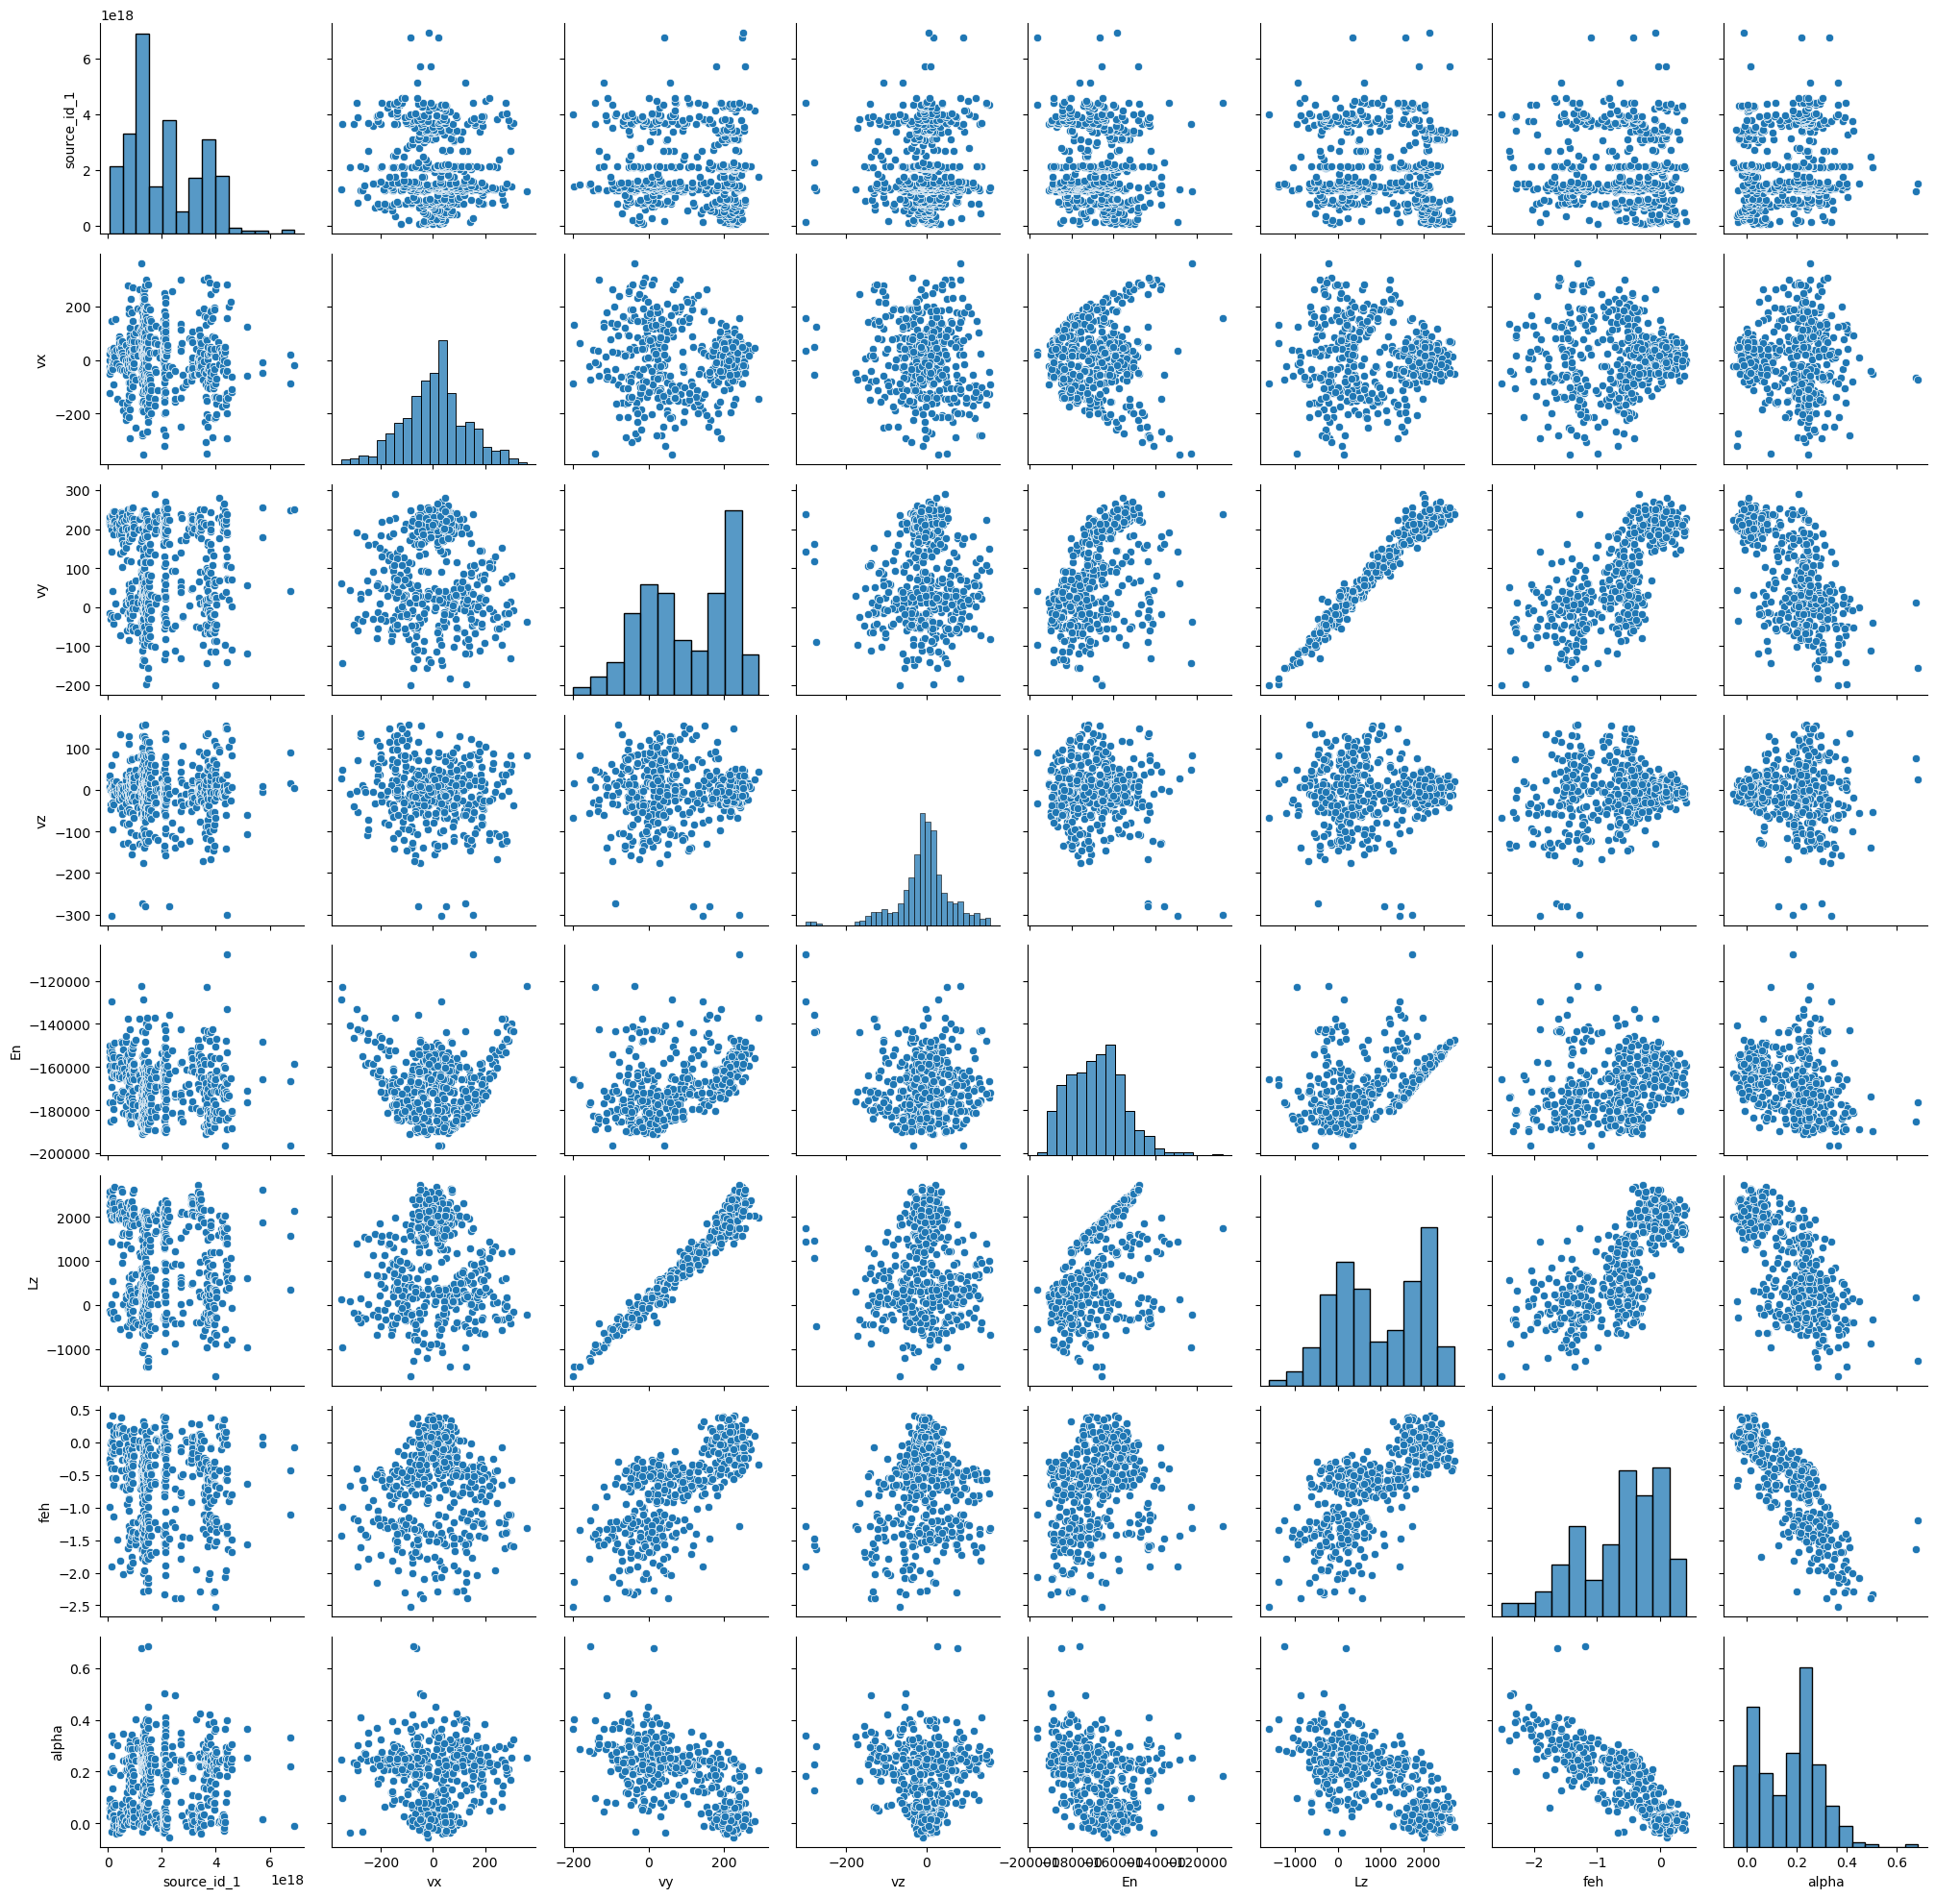

In [27]:
# Plot and visualize data
import seaborn as sns

# PairGrid plots pairwise relationships between variables and allows us to see if any clusters occur
# We can then observe those scatterplots more closely
first_plots = sns.PairGrid(gaia_data)
first_plots.map_diag(sns.histplot)
first_plots.map_offdiag(sns.scatterplot)
first_plots.add_legend()

Text(0.5, 1.0, 'Iron Abundance v/s Angular Moment')

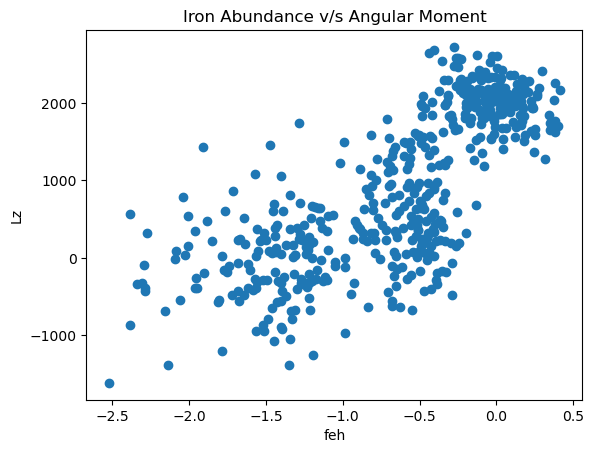

In [28]:
# From a first glance, we can see some clustering of data in certain scatterplots
# Histograms are also useful to check if multiple species are present by observing the number of peaks in the distribution
# We will observe 3 scatterplots where the formation of clusters is most evident!

# 1. feh v/s Lz
# In the plot below, we can identify 3 clusters
plt.scatter(gaia_data["feh"], gaia_data["Lz"])
plt.xlabel("feh")
plt.ylabel("Lz")
plt.title("Iron Abundance v/s Angular Moment")

Text(0.5, 1.0, 'Iron Abundance v/s Total Energy')

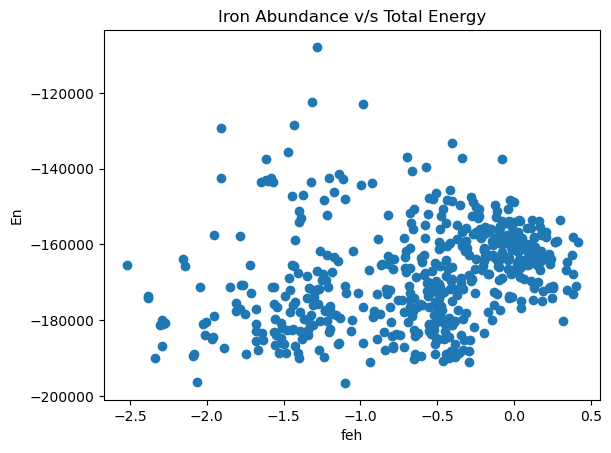

In [29]:
# 2. alpha v/s feh
# In the scatterplot below, we can identify 2 clusters
plt.scatter(gaia_data["feh"], gaia_data["En"])
plt.xlabel("feh")
plt.ylabel("En")
plt.title("Iron Abundance v/s Total Energy")

Text(0.5, 1.0, 'Angular Moment v/s Total Energy')

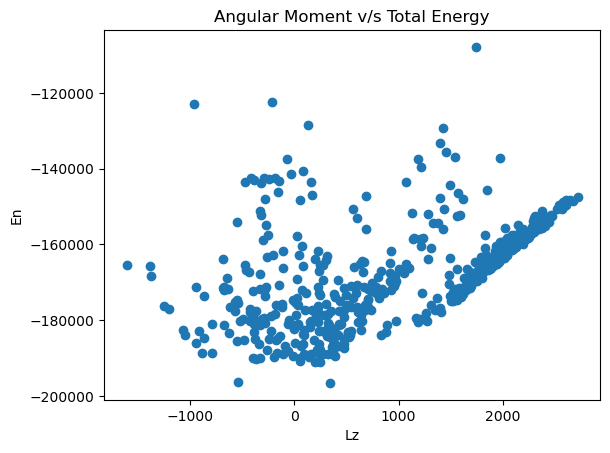

In [30]:
# Lz v/s En
# In the scatterplot below, we can identify 2 clusters
plt.scatter(gaia_data["Lz"], gaia_data["En"])
plt.xlabel("Lz")
plt.ylabel("En")
plt.title("Angular Moment v/s Total Energy")

## 3.4 Prepare Data

The data is mostly prepared already.

## 3.5 Select model and train


## Question 15
(4 pts)

**Choose a clustering algorithm and try to find clusters in the data. You can use any clustering algorithm that you would like.** Since this is unsupervised learning, we will not be splitting our data into training and testing. 

In [31]:
# Stars that form earlier have lower metallicity
# Stars that form later have higher metallicity

# Stack all values from df into n-dimesnional array so they are compatible with clustering algorithm
# Won't include apogee values since they are strings
source_id_vals = gaia_data['source_id_1'].values
vx_vals = gaia_data['vx'].values
vy_vals = gaia_data['vy'].values
vz_vals = gaia_data['vz'].values
En_vals = gaia_data['En'].values
Lz_vals = gaia_data['Lz'].values
feh_vals = gaia_data['feh'].values
alpha_vals = gaia_data['alpha'].values

initial_gaia_data = np.c_[source_id_vals, vx_vals, vy_vals, vz_vals, En_vals, Lz_vals, feh_vals, alpha_vals]

## Question 16
(4 pts)

**Discuss the properties of the clusters that the algorithm picked out. Visualize the clusters using the different features.**

In [32]:
# Make predictions with data
MAX_GAIA_CLUSTERS = 10

gaia_bics = []
for i in range(MAX_GAIA_CLUSTERS):
    #print(i+1)
    gaia_gm = GaussianMixture(n_components=i+1, random_state=42).fit(initial_gaia_data)
    gaia_bics.append(gaia_gm.bic(initial_gaia_data))

# Optimal number of clusters corresponds to minimum BIC score
# Will choose BIC score since AIC doesn't penalize increase in clusters as heavily
opt_gaia_bic = np.argmin(gaia_bics)+1
min_gaia_bic = np.min(gaia_bics)

print("Best number of clusters using all of the data is:", opt_gaia_bic)

Best number of clusters using all of the data is: 4


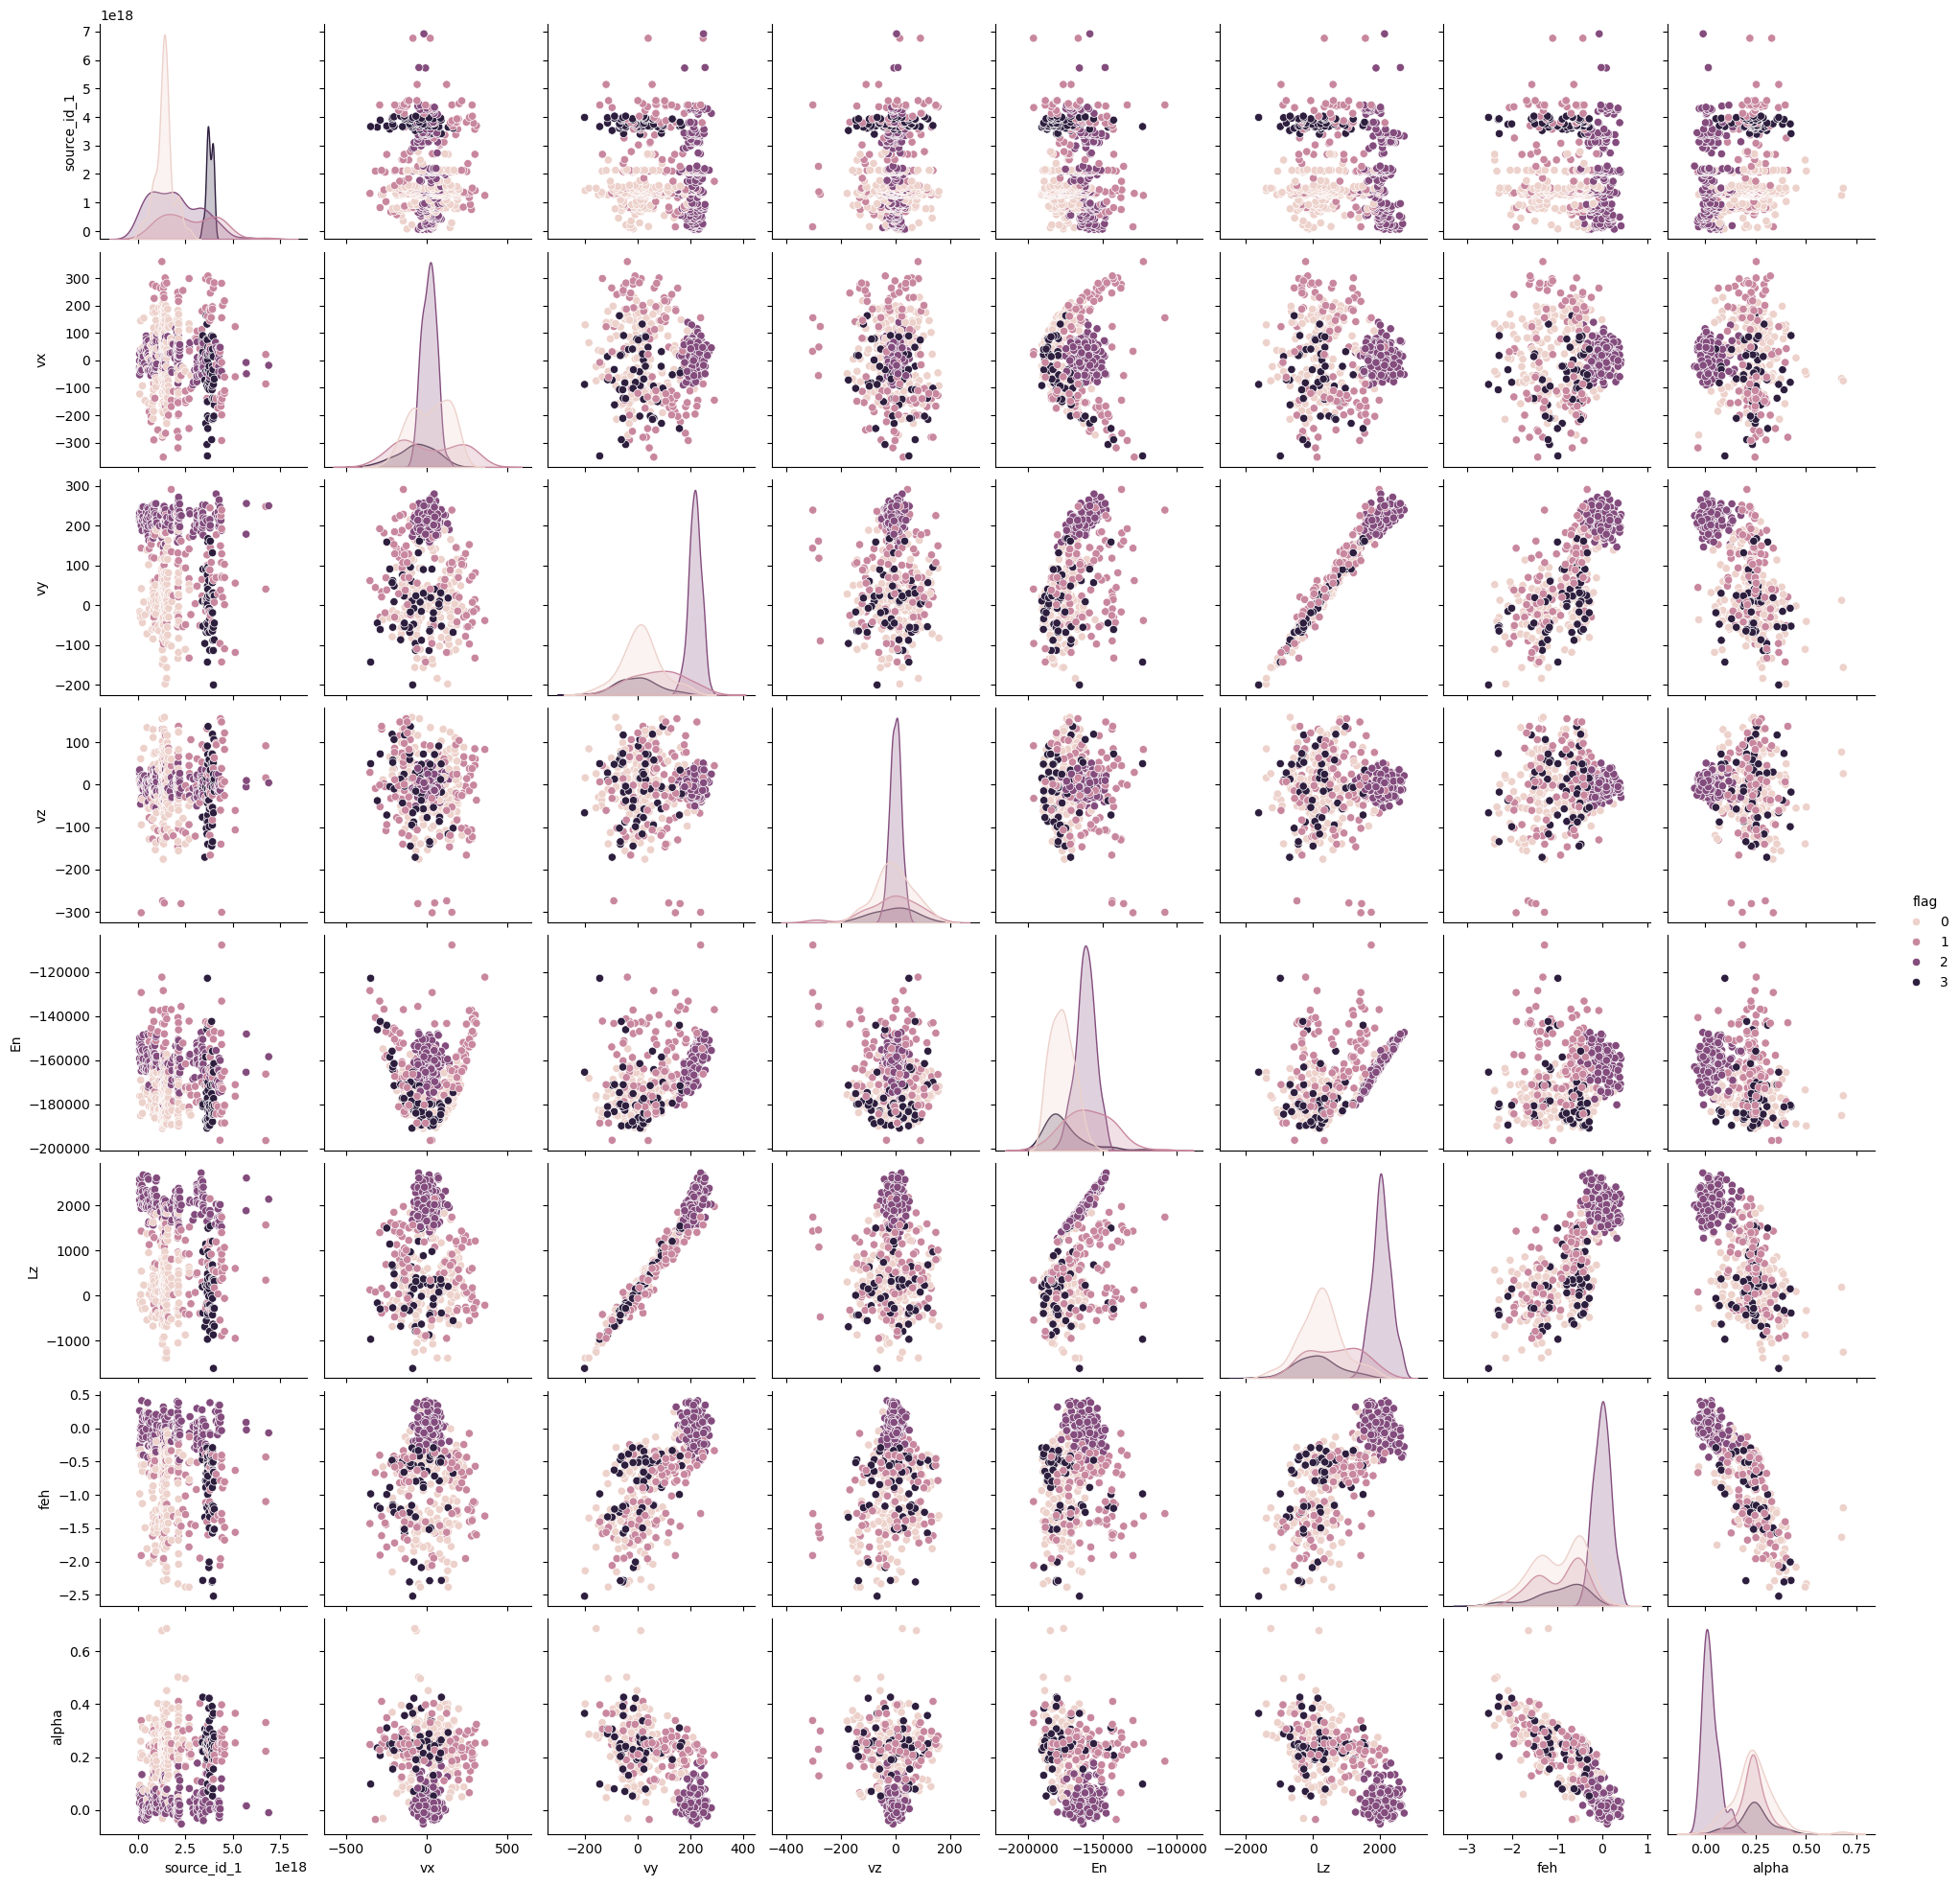

In [33]:
opt_gaia_gm = GaussianMixture(n_components=opt_gaia_bic, random_state=42).fit(initial_gaia_data)
first_preds = opt_gaia_gm.predict(initial_gaia_data)

# Visualize the clusters with all features using pairplot, everyone's favorite!
gaia_as_df = gaia_data[["source_id_1", "vx", "vy", "vz", "En", "Lz", "feh", "alpha"]]
preds_as_df = pd.DataFrame({"flag": first_preds})
gaia_as_df = pd.concat([gaia_as_df, preds_as_df], axis=1)
sns.pairplot(gaia_as_df, hue="flag")

## Question 17
(4 pts)

**Test the clustering performance. Discuss what how you determined the optimal number of clusters.**

Hint: the Milky Way should have two components: stars in the disk of the Milky Way and stars in the halo. Stars in the Milky Way disk have iron abundance and alpha-elemental abundance close to that of the Sun. Stars in the Milky Way Halo tend to have low iron abundance ([Fe/H] < 0). The velocities of the disk and halo are also different. The image below shows some components of the Milky Way. The central region is called the bulge (there are no stars in this sample from that component). 

<img src="disk_halo.jpg" alt="disk and halo" width="500"/>



Text(0.5, 1.0, 'Number of Clusters v/s BIC')

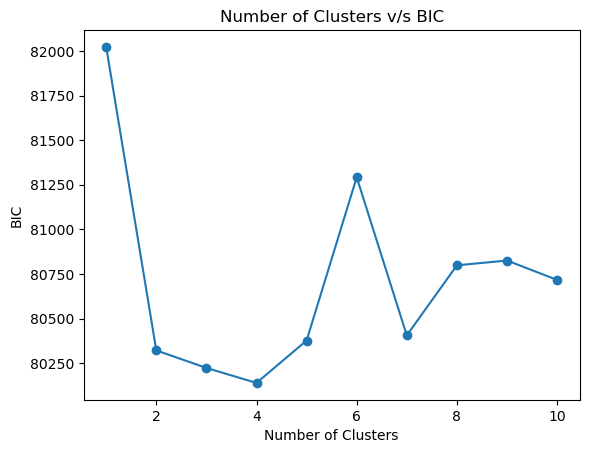

In [34]:
# We test cluster performance here by plotting the BIC score as a function of number of clusters
plt.scatter(np.arange(MAX_GAIA_CLUSTERS)+1, gaia_bics)
plt.plot(np.arange(MAX_GAIA_CLUSTERS)+1, gaia_bics)

plt.xlabel("Number of Clusters")
plt.ylabel("BIC")
plt.title("Number of Clusters v/s BIC")

The optimal number of clusters was determined using BIC. This criterion was chosen since it penalizes choosing a larger number of clusters while still prioritizing information gain from each cluster.

## 3.6 Fine tune model

## Question 18
(5 pts)

**Try another clustering algorithm and compare its performance with the previous method. Are there differences in how the clustering works with different number of features? What features are most helpful to distinguish clusters?**

Hint: you can use the original paper Helmi et al. (2018): https://arxiv.org/abs/1806.06038 as a guide for how to think about the features. The original paper did not use clustering algorithms, but rather knowledge about the Milky Way's properties to find an extra component that did not belong. 

In [35]:
# Will now use Bayesian Gaussian Mixture algorithm
# Chose 4 clusters using result from GMM fit
gaia_bgm = BayesianGaussianMixture(n_components=4, random_state=42).fit(initial_gaia_data)
bgm_preds = gaia_bgm.predict(initial_gaia_data)

In [36]:
# Will compare performance of these methods using silhouette score
bgm_sil = silhouette_score(initial_gaia_data, bgm_preds)
gm_sil = silhouette_score(initial_gaia_data, first_preds)

# -ve score means instance is closer to other clusters on avg than the one its assigned to aka it might be incorrectly assigned
print("Currently, the Gaussian Mixture Model (GMM) with a silhouette score of:", gm_sil,
      "performs better than the Bayesian Gaussian Mixture Model with a score of:", bgm_sil)
print("Hence, we will stick with GMM going forward.")

Currently, the Gaussian Mixture Model (GMM) with a silhouette score of: -0.025541926456062604 performs better than the Bayesian Gaussian Mixture Model with a score of: -0.06194366269328003
Hence, we will stick with GMM going forward.


In [37]:
# Lets us now use a subset of the features instead of all of them
# From the joint plots made earlier, we know some features that would be useful to distinguish clusters are 
# feh, Lz, En, due to their bimodal histograms and the distinct clusters observed when these features are plotted
# against each other
optim_gaia_data = np.c_[En_vals, Lz_vals, feh_vals]

# Now we see if the clustering changes
optim_gaia_bics = []
for i in range(MAX_GAIA_CLUSTERS):
    optim_gaia_gm = GaussianMixture(n_components=i+1, random_state=42).fit(optim_gaia_data)
    optim_gaia_bics.append(optim_gaia_gm.bic(optim_gaia_data))

optim_gaia_bic = np.argmin(optim_gaia_bics)+1
minim_gaia_bic = np.min(optim_gaia_bics)

print('Best number of clusters using select features is now:', optim_gaia_bic)

Best number of clusters using select features is now: 3


After changing the gaia dataset to only use the vy, En, Lz, feh, and alpha features, the optimal number of clusters is now 3. This is better since the number of clusters has reduced meaning we have selected relevant features. We will use 3 clusters going forward with our Gaussian Mixture Model.

In [38]:
final_gaia_gm = GaussianMixture(n_components=3, random_state=42).fit(optim_gaia_data)
final_preds = final_gaia_gm.predict(optim_gaia_data)

## 3.7 Present solution


## Question 19
(2 pts)

**Discuss whether you can detect the presense of a dwarf galaxy in the data?**



Yes, we should be able to detect the presence of a dwarf galaxy in the data. We have 3 clusters while the number of Milky Way components are only 2. Thus, the remaining cluster must belong to something else, and is likely a dwarf galaxy.

## Question 20
(2 pts)

**How does your clustering solution compared with the original paper?**

In the lab directory there's a file called ``gaia_apogee_match_flag.csv`` that is the same as the file you loaded, except there is a new column called ``flag``. This flag is based on the identification of the stars from the Helmi et al. (2018) paper.

The flag values are:
0 = Milky Way disk stars
1 = Milky Way halo stars
2 = stars from the dwarf galaxy 

Note that the identification from the Helmi et al. (2018) paper is based on some specific thresholds in energy and angular momentum, so a clustering algorithm may give more nuanced assignments to the component that each star belongs to. 


In [39]:
from sklearn.metrics import accuracy_score

# Read in data with flag
flagged_data = pd.read_csv("gaia_apogee_match_flag.csv")

# Extract flag column
validation_data = flagged_data["flag"].values

# Line up indices of predicted data with validation data
for i in range(len(final_preds)):
    if final_preds[i] == 2:
        final_preds[i] = 0
    else:
        final_preds[i] += 1

# Measure accuracy of our data with validation set 
acc = accuracy_score(validation_data, final_preds)
print("Accuracy of the GMM with select features is:", acc)

Accuracy of the GMM with select features is: 0.7908745247148289


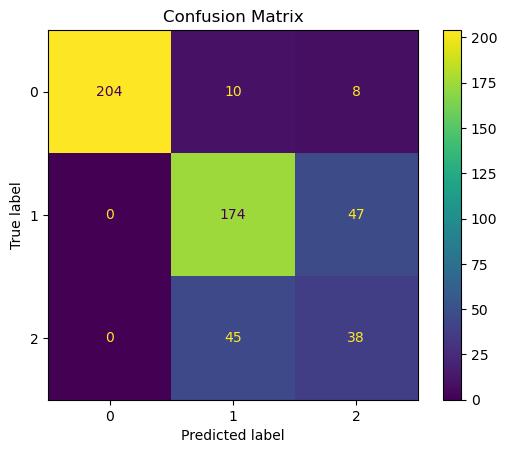

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(validation_data, final_preds)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Lab Survey and Submit
Please take this lab survey to give us feedback to improve the lab! Survey Link: https://forms.gle/28yywKq2tYV15YXE9

**Remeber to restart your kernel and run all cells before submitting!**

